In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf
from sklearn.linear_model import LinearRegression

In [2]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol']

In [3]:
def calc_macd(data, len1, len2, len3):
    shortEMA = data.ewm(span=len1, adjust=False).mean()
    longEMA = data.ewm(span=len2, adjust=False).mean()
    MACD = shortEMA - longEMA
    signal = MACD.ewm(span=len3, adjust=False).mean()
    return MACD, signal

def calc_rsi(data, period):
    delta = data.diff()
    up = delta.clip(lower=0)
    down = -1*delta.clip(upper=0)
    ema_up = up.ewm(com=period, adjust=False).mean()
    ema_down = down.ewm(com=period, adjust=False).mean()
    rs = ema_up / ema_down
    rsi = 100 - (100/(1+rs))
    return rsi

def calc_bollinger(data, period):
    mean = data.rolling(period).mean()
    std = data.rolling(period).std()
    upper_band = np.array(mean) + 2*np.array(std)
    lower_band = np.array(mean) - 2*np.array(std)
    return upper_band, lower_band

[*********************100%***********************]  1 of 1 completed


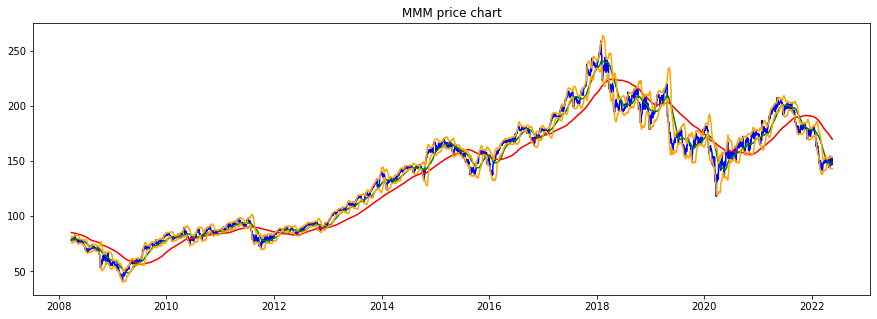

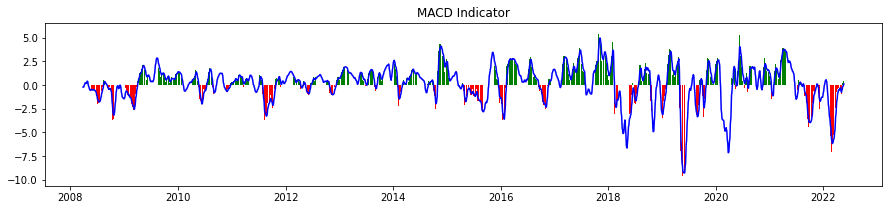

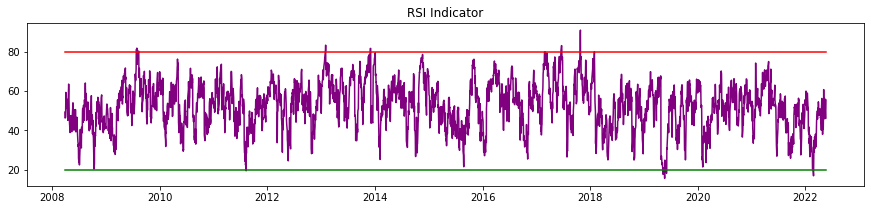

,Open,Close,Volume,Prev_Close,Prev_Volume,Weekday,5SMA,10SMA,20SMA,50SMA,...,10d_20SMA,10d_50SMA,10d_100SMA,10d_200SMA,10d_MACD,10d_MACD_signal,10d_RSI,10d_RSI_Volume,10d_Upper_Band,10d_Lower_Band
Date,,,,,,,,,,,,,,,,,,,,,
2008-03-27,78.800003,77.860001,3600200,78.660004,3700200.0,3,78.746002,78.822001,78.531001,78.5548,...,-0.008341,-0.006993,-0.010960,-0.004892,-0.813045,-0.358513,0.068724,-0.100190,-0.015139,-0.001003
2008-03-28,78.389999,77.949997,2006400,77.860001,3600200.0,4,78.424002,78.766001,78.400001,78.5420,...,-0.009570,-0.005478,-0.010083,-0.004807,-0.690551,-0.458349,-0.039854,-0.070246,-0.018566,0.000146
2008-03-31,78.059998,79.150002,3505600,77.949997,2006400.0,0,78.418001,78.653001,78.307500,78.5574,...,-0.009299,-0.003961,-0.008912,-0.004743,-0.538515,-0.477012,-0.086213,-0.228599,-0.017207,-0.000798
2008-04-01,79.610001,81.320000,4813600,79.150002,3505600.0,1,78.520001,78.815001,78.345000,78.5944,...,-0.007091,-0.002181,-0.008510,-0.004607,-0.705341,-0.531027,0.155158,-0.133353,-0.014850,0.001254
2008-04-02,81.239998,80.910004,2871700,81.320000,4813600.0,2,78.988000,79.096001,78.486501,78.7216,...,-0.004389,0.000498,-0.008022,-0.004414,-1.185644,-0.666205,0.208344,-0.047333,-0.007258,-0.001306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16,149.220001,150.500000,2713700,149.300003,2753300.0,0,149.360001,149.401001,148.510501,148.1368,...,0.000367,0.003181,-0.016406,-0.014513,-1.066813,-0.846946,0.253494,-0.129588,0.007245,-0.006936
2022-05-17,151.990005,152.339996,2106800,150.500000,2713700.0,1,148.984000,149.860001,148.726501,148.2122,...,0.003099,0.004063,-0.015923,-0.014362,-1.174349,-0.945682,0.177919,-0.096732,0.008947,-0.003118
2022-05-18,151.589996,148.929993,2958700,152.339996,2106800.0,2,149.628000,150.286000,148.838501,148.3934,...,0.004346,0.005228,-0.015470,-0.014258,-1.463512,-1.071085,0.119183,-0.051996,0.011770,-0.003544


In [4]:
# Prepare data and get indicators. Plot graphs
for ticker in tickers[0:1]:
    end_date = datetime.now()
    start_date = end_date - timedelta(days=15*365)
    
    history = yf.download(ticker, start=start_date, end=end_date, interval='1d', prepost=False)
    history = history.loc[:, ['Open', 'Close', 'Volume']]
    history['Prev_Close'] = history.loc[:, 'Close'].shift(1)
    history['Prev_Volume'] = history.loc[:, 'Volume'].shift(1)
    datetimes = history.index.values
    weekdays = []
    for dt in datetimes:
        dt = datetime.strptime(str(dt), '%Y-%m-%dT%H:%M:%S.000000000')
        weekdays.append(dt.weekday())
    history['Weekday'] = weekdays
    
    # indicators
    history['5SMA'] = history['Prev_Close'].rolling(5).mean()
    history['10SMA'] = history['Prev_Close'].rolling(10).mean()
    history['20SMA'] = history['Prev_Close'].rolling(20).mean()
    history['50SMA'] = history['Prev_Close'].rolling(50).mean()
    history['100SMA'] = history['Prev_Close'].rolling(100).mean()
    history['200SMA'] = history['Prev_Close'].rolling(200).mean()
    
    MACD, signal = calc_macd(history['Prev_Close'], 12, 26, 9)
    history['MACD'] = MACD
    history['MACD_signal'] = signal
    
    history['RSI'] = calc_rsi(history['Prev_Close'], 13)
    history['RSI_Volume'] = calc_rsi(history['Prev_Volume'], 13)
    
    upper, lower = calc_bollinger(history['Prev_Close'], 20)
    history['Upper_Band'] = upper
    history['Lower_Band'] = lower
    
    # percent changes
    labels = ['Prev_Close', 'Prev_Volume','5SMA', '10SMA', '20SMA', '50SMA', '100SMA', '200SMA', 'MACD', 'MACD_signal', 'RSI', 'RSI_Volume', 'Upper_Band', 'Lower_Band']
    
    period = 1
    new_labels = [str(period)+'d_'+label for label in labels]
    history[new_labels] = history[labels].pct_change(period, fill_method='ffill')
    
    period = 2
    new_labels = [str(period)+'d_'+label for label in labels]
    history[new_labels] = history[labels].pct_change(period, fill_method='ffill')
    
    period = 5
    new_labels = [str(period)+'d_'+label for label in labels]
    history[new_labels] = history[labels].pct_change(period, fill_method='ffill')
    
    period = 10
    new_labels = [str(period)+'d_'+label for label in labels]
    history[new_labels] = history[labels].pct_change(period, fill_method='ffill')
    
    history = history.replace(np.inf, np.nan).dropna()
    
    x = history.index.values
    plt.figure(figsize=(15,5))
    plt.plot(x, history['Prev_Close'], color='blue')
    plt.plot(x, history['200SMA'], color='red')
    plt.plot(x, history['50SMA'], color='green')
    plt.plot(x, history['Upper_Band'], color='orange')
    plt.plot(x, history['Lower_Band'], color='orange')
    plt.title(f'{ticker} price chart')
    #plt.xlim(x[200], x[300])
    plt.show()
    
    plt.figure(figsize=(15,3))
    colors = np.array(['green']*len(history['MACD']))
    colors[history['MACD']<0] = 'red'
    plt.bar(x, history['MACD'], color=colors)
    plt.plot(x, history['MACD_signal'], color='blue')
    plt.title('MACD Indicator')
    #plt.xlim(x[1000], x[1500])
    plt.show()
    
    plt.figure(figsize=(15,3))
    plt.plot(x, history['RSI'], color='purple')
    plt.plot([x[0], x[-1]], [80,80], color='red')
    plt.plot([x[0], x[-1]], [20,20], color='green')
    plt.title('RSI Indicator')
    #plt.xlim(x[1000], x[1500])
    plt.show()
    
    
    display(history)



In [5]:
# Machine learning model - Linear Regression


In [6]:
y = history['Close']
X = history.drop(['Close', 'Volume'], axis=1).values

num_test = 365
X_train = X[:-1*num_test]
y_train = y[:-1*num_test]
X_test = X[-1*num_test:]
y_test = y[-1*num_test:]

MMM


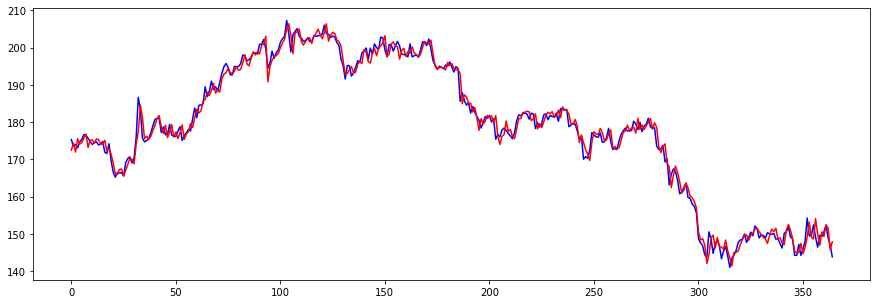

In [7]:
model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(ticker)
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test, 'blue')
plt.plot(range(len(y_pred)), y_pred, 'red')
plt.show()

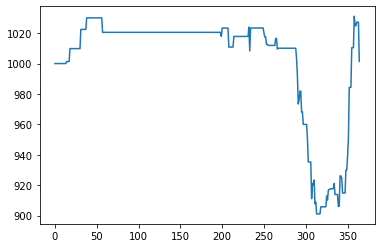

Investing Total: 832.98. Percentage change: (-17, 1)%
Algo trading Total: 1001.41. Percentage change: 0.1%


In [8]:
def test_model(opens, closes, y_pred, start_account=1000, threshold=0):
    account = start_account
    changes = []
    
    for i in range(len(y_pred)):
        if (y_pred[i]-opens[i])/opens[i] >= threshold:
            account += account*(closes[i]-opens[i])/opens[i]
        changes.append(account)
    changes = np.array(changes)
    
    plt.plot(range(len(changes)), changes)
    plt.show()
    
    invest_total = start_account + start_account*(closes[-1]-opens[0])/opens[0]
    print(f'Investing Total: {round(invest_total,2)}. Percentage change: {round((invest_total-start_account)/start_account*100), 1}%')
    print(f'Algo trading Total: {round(account,2)}. Percentage change: {round((account-start_account)/start_account*100, 1)}%')
    
test_model(X_test.T[0], y_test, y_pred, 1000, 0.001)